In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
goog_data = pd.read_csv('GOOG.csv', index_col='Date',parse_dates=True)

<h2> EMA Short Code</h2>

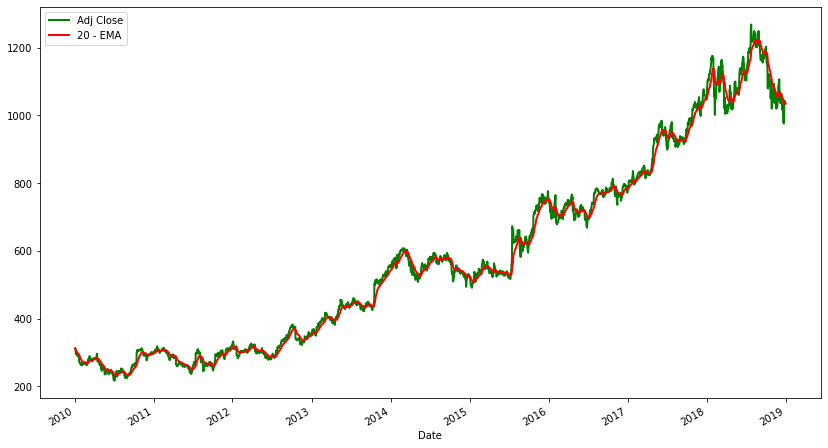

In [4]:
goog_data['20 - EMA'] = goog_data['Adj Close'].ewm(span=20).mean()
goog_data['Adj Close'].plot(figsize=(14,8),label='Adj Close', color='g', lw=2)
goog_data['20 - EMA'].plot(label= '20 - EMA', color='r', lw=2)
plt.legend();

<h2> EMA - Long method</h2>

<AxesSubplot:xlabel='Date', ylabel='Google price in $'>

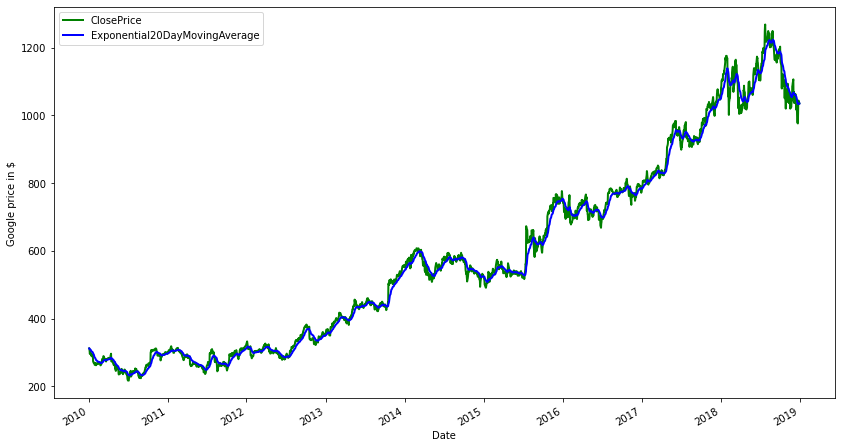

In [5]:
num_periods = 20 # number of days over which to average
K = 2 / (num_periods + 1) # smoothing constant
ema_p = 0
ema_values = [] # to hold computed EMA values
close = goog_data['Close']

for close_price in close:
    if (ema_p == 0): # first observation, EMA = current-price
        ema_p = close_price
    else:
        ema_p = (close_price - ema_p) * K + ema_p
    ema_values.append(ema_p)

goog_data = goog_data.assign(ClosePrice=pd.Series(close,index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values,index=goog_data.index))
close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)